In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Description: Data related to direct marketing campaigns of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit or not.

## Prelimnary Analysis

In [12]:
bank_data = pd.read_csv("bank-additional-full.csv", sep=';')

In [22]:
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
bank_data.shape

(41188, 21)

In [15]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [27]:
bank_data.duplicated().sum()

12

### Checking missing values

In [16]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

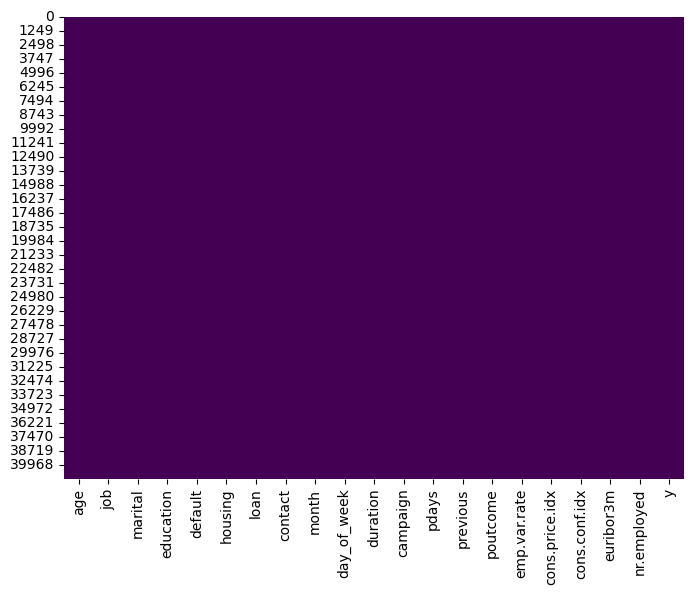

In [19]:
matplotlib.rcParams['figure.figsize'] = (8,6)

sns.heatmap(bank_data.isnull(),cbar=False,cmap='viridis')

### Checking statistical features

In [29]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Checking the count of binary distribution in Target variable

<Axes: xlabel='y', ylabel='count'>

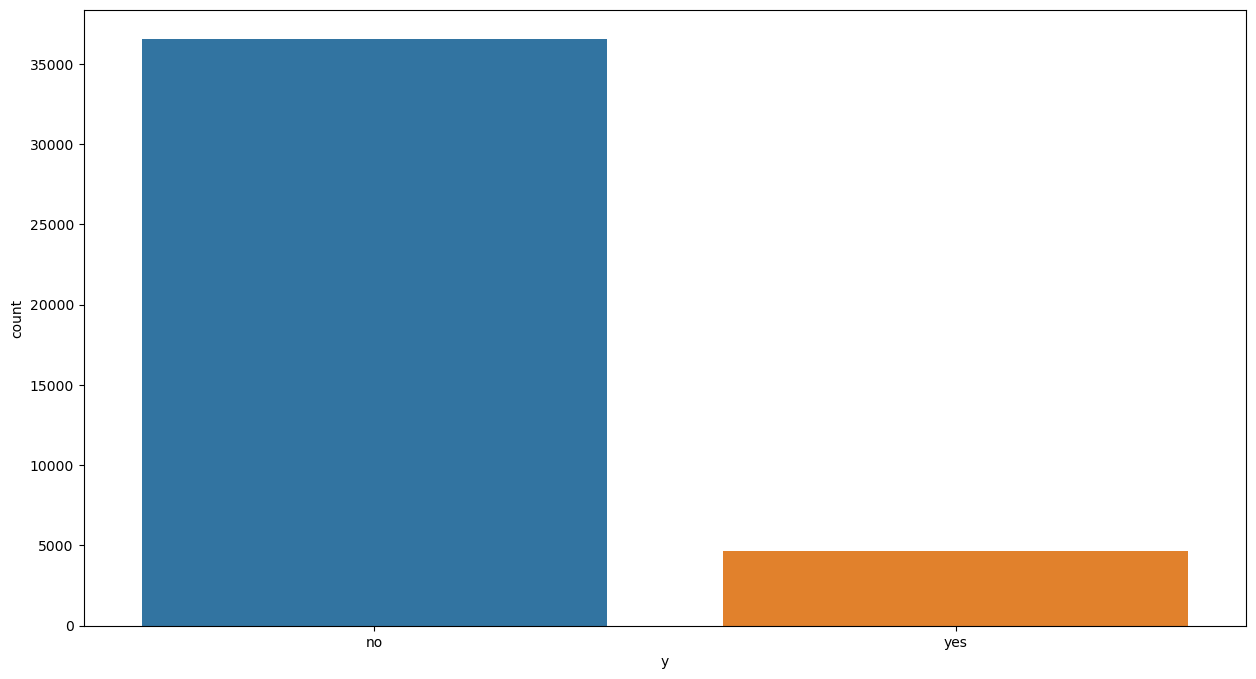

In [35]:
matplotlib.rcParams['figure.figsize'] = (15,8)
sns.countplot(x="y", data=bank_data)

In [36]:
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## One Hot Encoding Categorical Features

In [40]:
categorical_columns = bank_data.select_dtypes(include=['object']).columns.to_list()
categorical_columns.remove('y') # We exclude the target variable 'y' from this list

In [42]:
# Apply one-hot encoding to the categorical columns

data_encoded = pd.get_dummies(bank_data, columns= categorical_columns, drop_first=True)
data_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [44]:
data_encoded.shape

(41188, 54)

## Data Splitting

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = data_encoded.drop('y',axis=1)
y = data_encoded['y']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 53), (8238, 53), (32950,), (8238,))

## Scaling the data

In [48]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled[:5,:]

array([[-0.96197109, -0.6420749 , -0.56125782,  0.19415627, -0.35020405,
        -1.19703518, -1.17966675, -1.22839406, -1.33739835, -0.93903109,
         1.8570123 , -0.1908514 , -0.16075011, -0.27648799, -0.20605243,
        -0.18706104, -0.32683168, -0.14472613, -0.44331528, -0.15965401,
        -0.09157161,  0.8073893 , -0.62295246, -0.0430665 ,  4.07680277,
        -0.41167522, -0.54890019, -0.0213411 , -0.38335967, -0.646527  ,
        -0.209549  ,  1.95558292, -0.00954229, -0.15995362,  0.95657182,
        -0.15995362, -0.42509687, -0.75569012, -0.41730551, -0.0678513 ,
        -0.46176381, -0.38356793, -0.1168718 ,  1.41125724, -0.33288354,
        -0.13244096, -0.12029316,  1.96228986, -0.51607518, -0.49406521,
        -0.49473065,  0.39791342, -0.18470193],
       [ 1.72913046, -0.55734092,  0.51363002,  0.19415627, -0.35020405,
        -1.19703518, -0.35638329,  1.23515582, -1.72015561, -2.18971478,
        -0.5384994 , -0.1908514 , -0.16075011, -0.27648799, -0.20605243,
   

## Modelling

In [51]:
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression()

In [52]:
reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Model Evaluation

In [53]:
pred = reg_model.predict(X_test_scaled)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, pos_label='yes')
recall = recall_score(y_test, pred, pos_label='yes')
f1 = f1_score(y_test, pred, pos_label='yes')

accuracy, precision, recall, f1

(0.9098082058752124,
 0.6623586429725363,
 0.4343220338983051,
 0.5246321177223289)

 Accuracy: 91.15%
This means that the model correctly predicted the outcome for 91.15% of the samples in the test set.

Precision: 67.00%
Out of the instances that the model predicted as "yes" (i.e., the client would subscribe to a term deposit), 67% were actually "yes".

Recall: 43.42%
Out of all the actual "yes" instances in the test set, the model correctly identified 43.42% of them.

F1-Score: 52.69%
This is the harmonic mean of precision and recall and provides a balance between them.